In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

EDA

In [2]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('insurance2.csv')
print(df.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.shape

(1338, 8)

In [31]:
# Step 2: Summary statistics of numeric columns
print(df.describe())

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  insuranceclaim  
count  1338.000000   1338.000000     1338.000000  
mean      1.515695  13270.422265        0.585202  
std       1.104885  12110.011237        0.492871  
min       0.000000   1121.873900        0.000000  
25%       1.000000   4740.287150        0.000000  
50%       2.000000   9382.0

In [32]:
# Step 3: Value counts of categorical columns
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
1    676
0    662
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


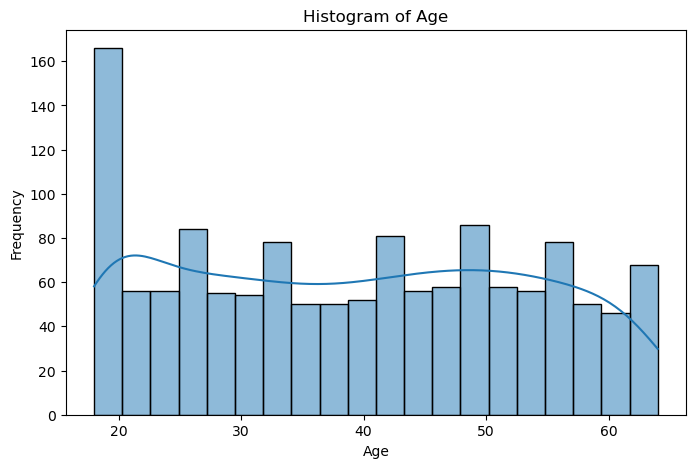

In [50]:
# Step 4: Data Visualization
# Univariate Histograms
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

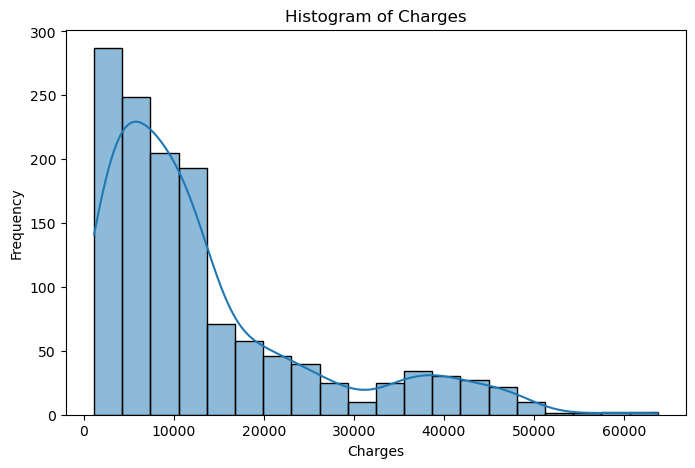

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], bins=20, kde=True)
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

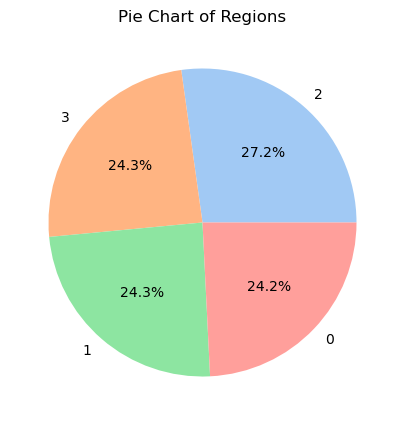

In [63]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Regions')
plt.ylabel('')
plt.show()

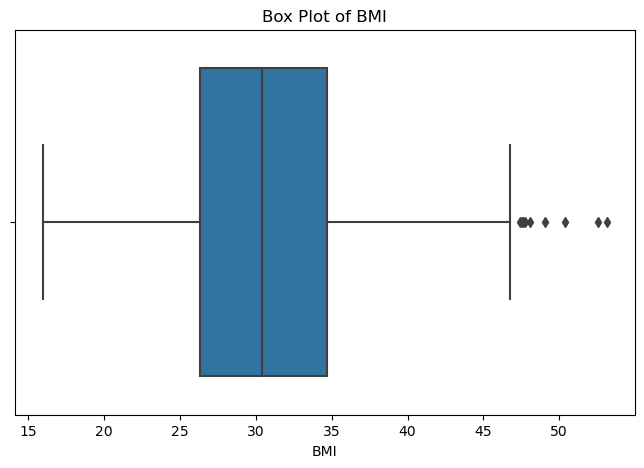

In [64]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

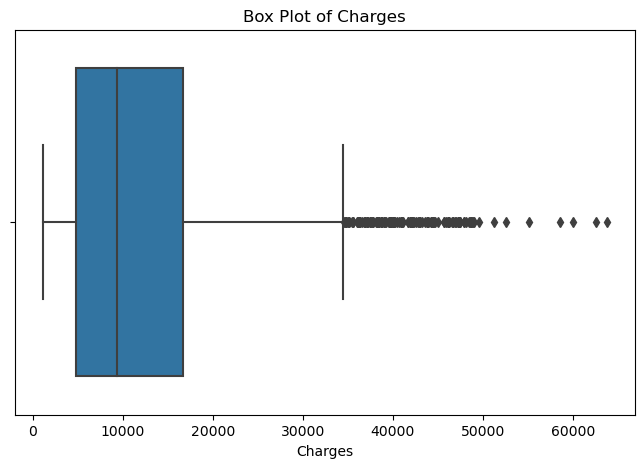

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['charges'])
plt.title('Box Plot of Charges')
plt.xlabel('Charges')
plt.show()

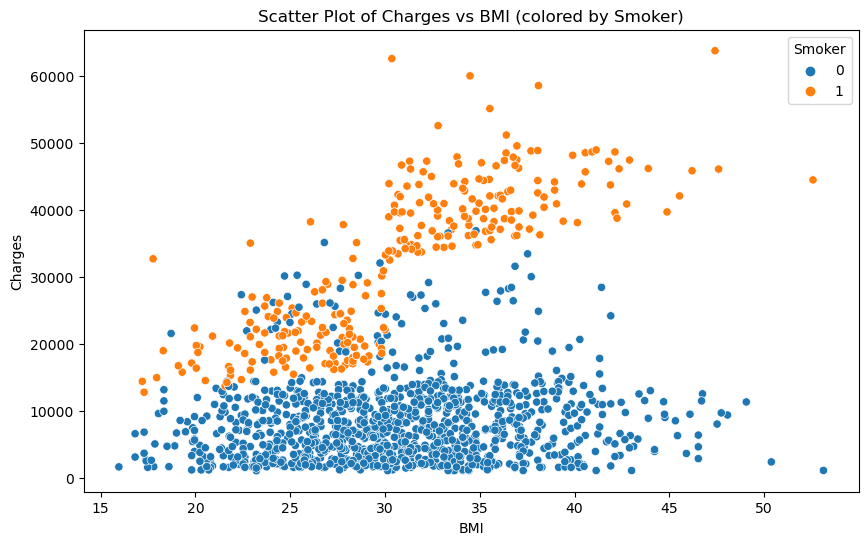

In [66]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Scatter Plot of Charges vs BMI (colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

Data Preprocessing

In [33]:
# Step 4: Check for missing values
print(df.isnull().sum())


age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


In [34]:
# Step 8: Convert 'sex', 'smoker', and 'region' columns to object type (if needed)
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('object')

# Step 9: Handle missing values
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include='object')

for column in df_num.columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in df_cat.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

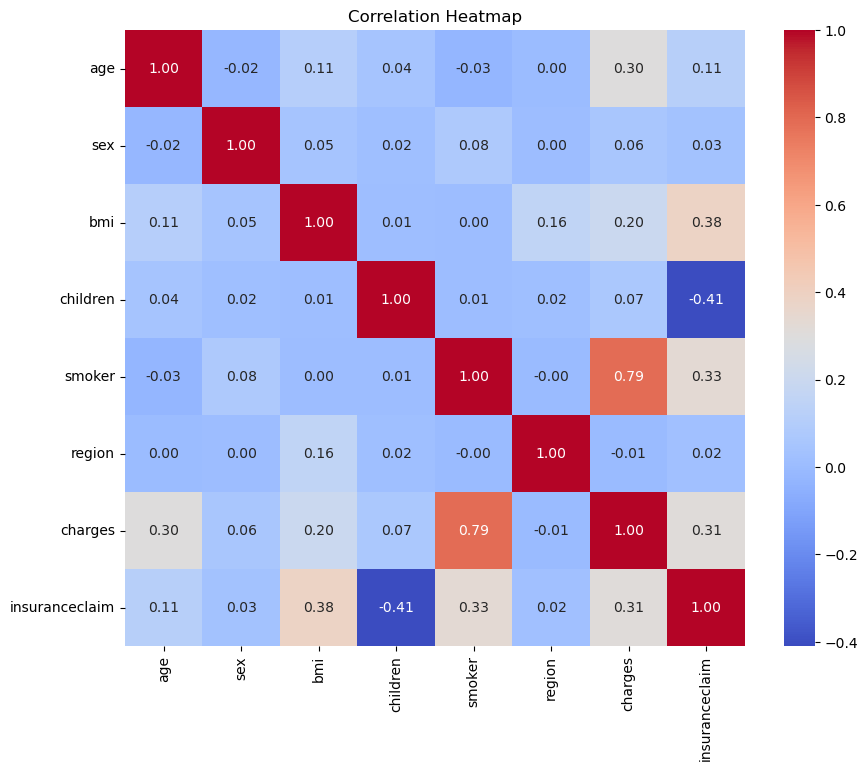

In [35]:
# Step 10: Correlation heatmap to see relationships between numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/Users/brahmirathod/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


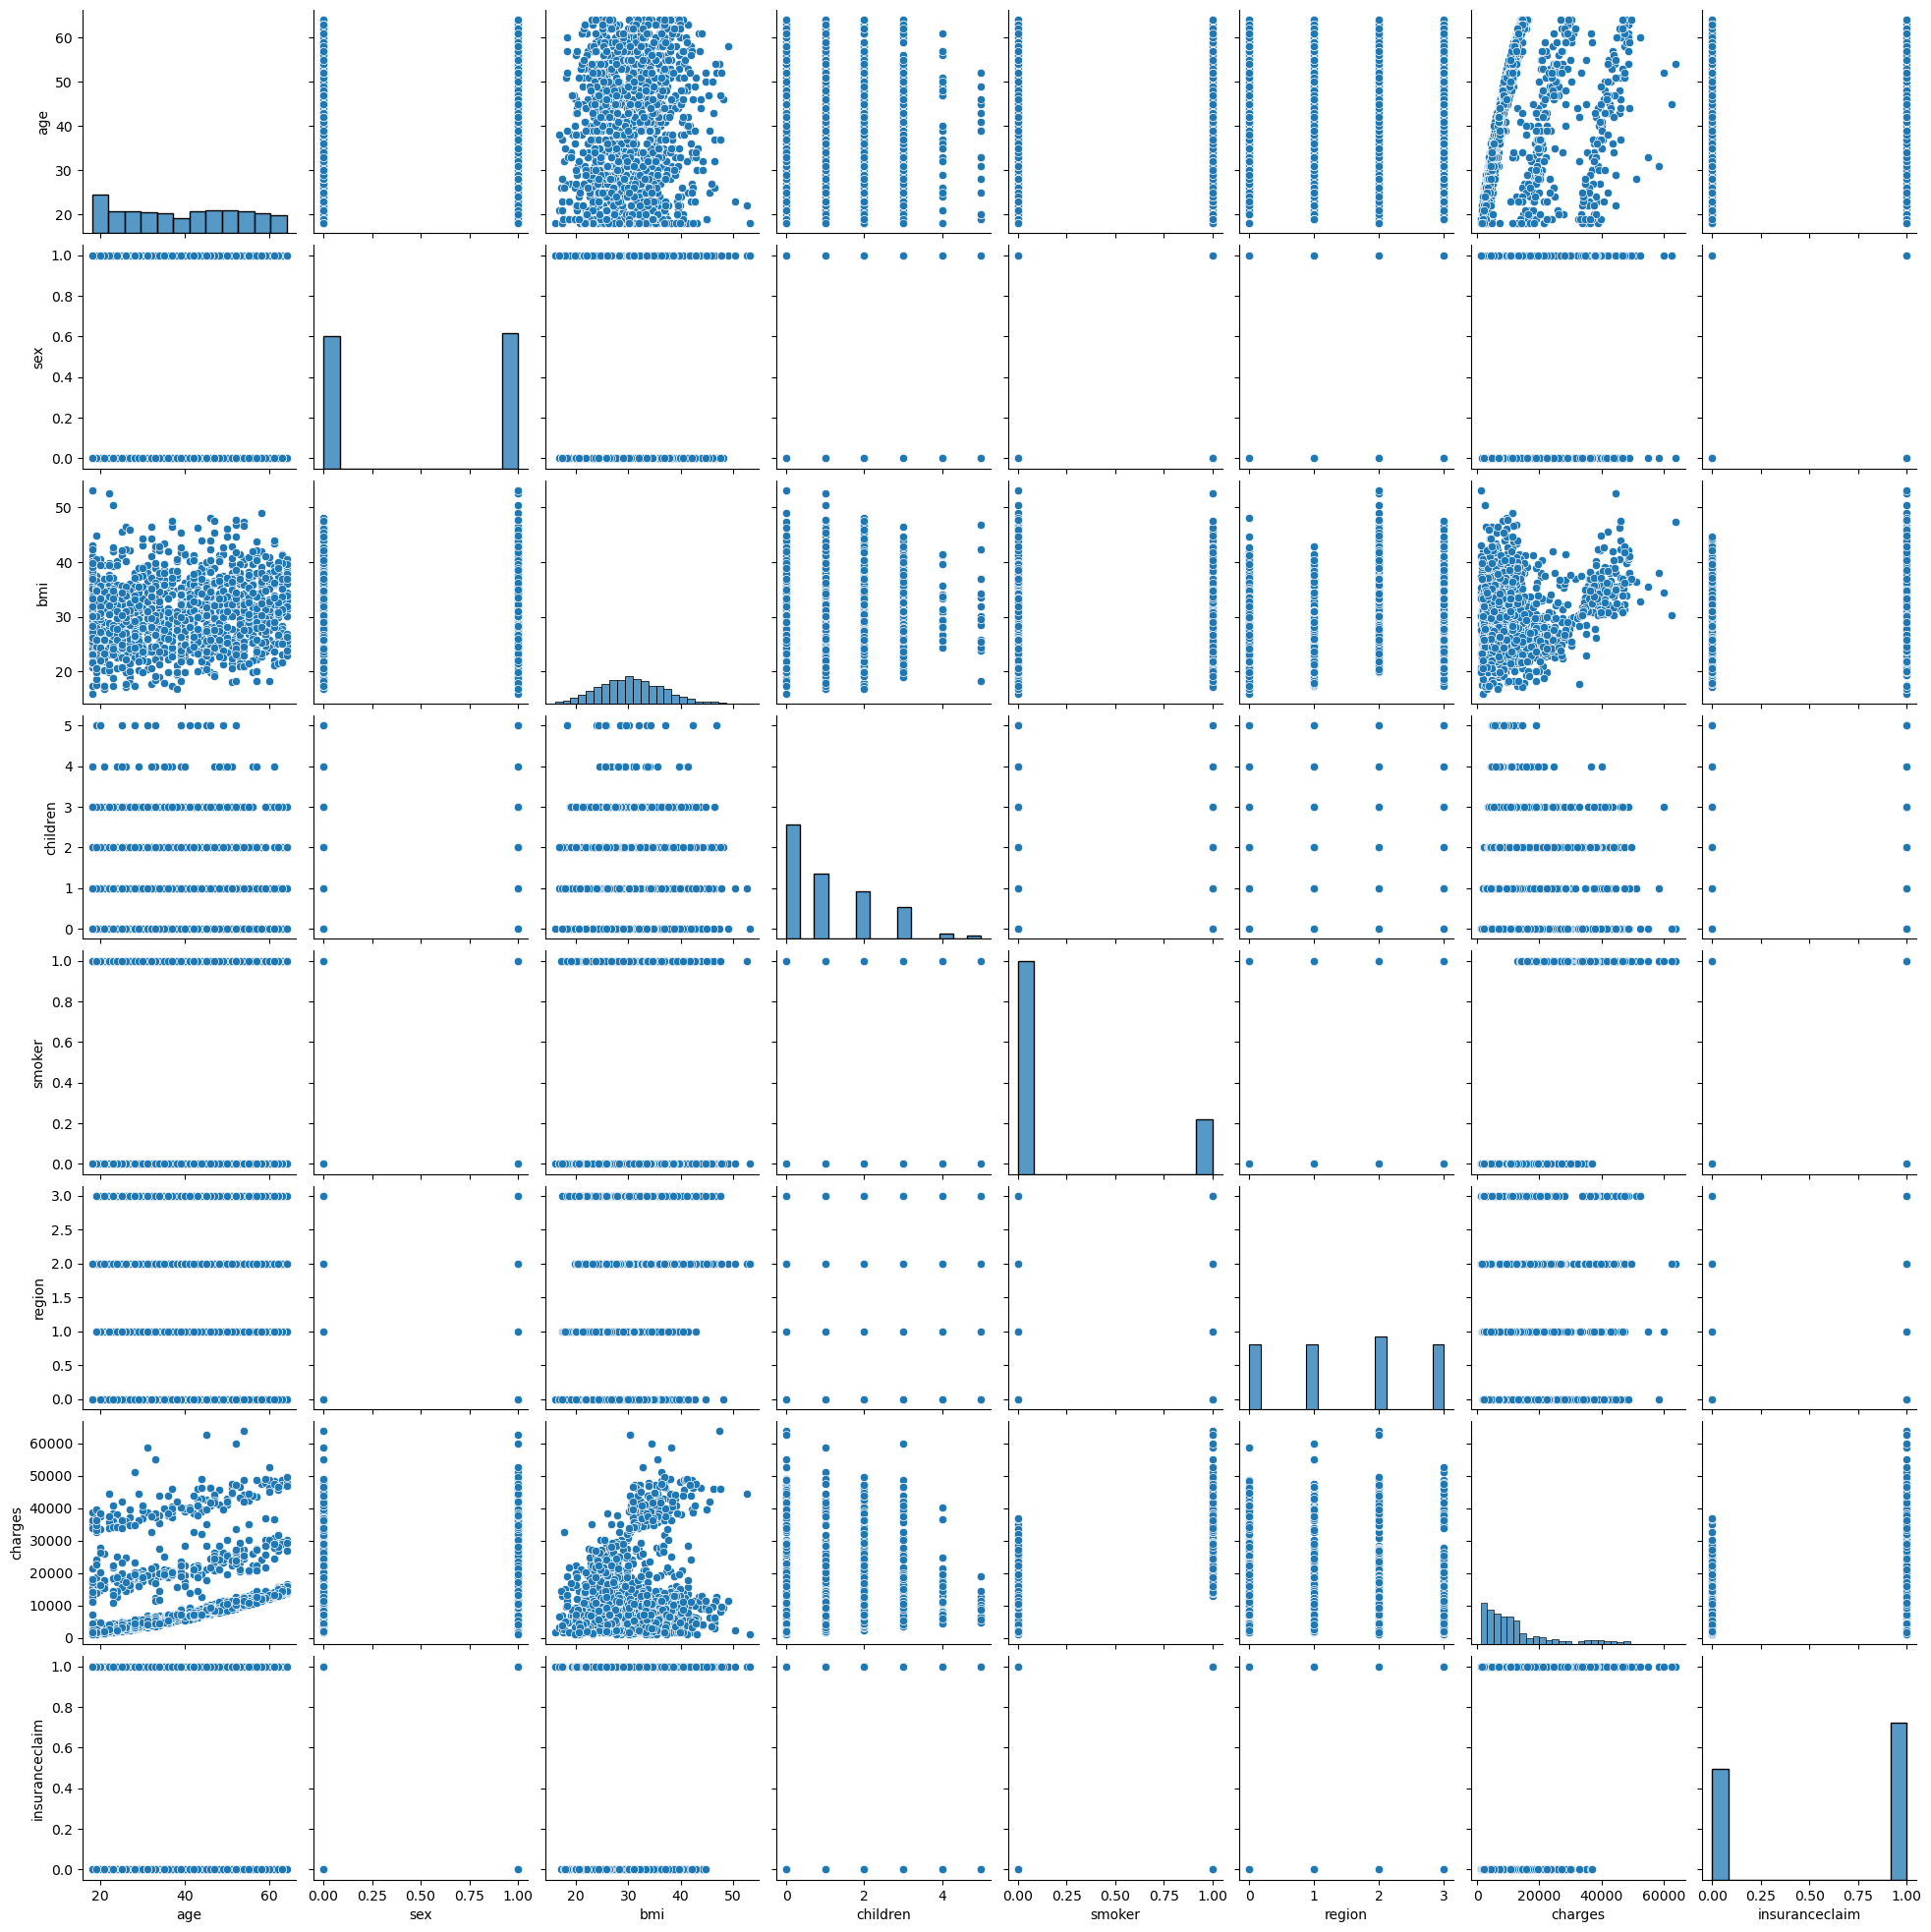

In [36]:
# Step 11: Pairplot to see relationships between pairs of variables
sns.pairplot(df)
plt.show()

In [37]:
# Step 12: Prepare the data for modeling
y = df['charges']  # Label column
X = df.drop('charges', axis=1)  # Feature columns

In [38]:
# Step 13: One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Rescale numeric columns
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Step 16: Check the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 9) (268, 9) (1070,) (268,)


Model Training

KNN Regression

In [51]:
# Initialize the KNN model
knn = KNeighborsRegressor()

# Train the KNN model
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

Model Evaluation

In [52]:
# Make predictions with KNN
knn_predictions = knn.predict(X_test_scaled)

# Evaluate the KNN model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN Regressor - MSE: {knn_mse:.2f}, R2: {knn_r2:.2f}")


KNN Regressor - MSE: 34045751.22, R2: 0.78


Decision Tree

In [53]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

Model Evaluation

In [54]:
# Make predictions with Decision Tree
decision_tree_predictions = decision_tree.predict(X_test_scaled)

# Evaluate the Decision Tree model
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print(f"Decision Tree Regressor - MSE: {decision_tree_mse:.2f}, R2: {decision_tree_r2:.2f}")


Decision Tree Regressor - MSE: 48742675.22, R2: 0.69


Linear Regression

Model Training

In [55]:
# Initialize the Linear Regression model
linear_regression = LinearRegression()

# Train the Linear Regression model
linear_regression.fit(X_train_scaled, y_train)


LinearRegression()

Model Evaluation

In [58]:
# Make predictions with Linear Regression
linear_regression_predictions = linear_regression.predict(X_test_scaled)

# Evaluate the Linear Regression model
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)
print(f"Linear Regression - MSE: {linear_regression_mse:.2f}, R2: {linear_regression_r2:.2f}")

Linear Regression - MSE: 33733663.22, R2: 0.78


Random Forest Regression

Model Training

In [70]:
# Initialize the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Train the Random Forest model
random_forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation

In [71]:
# Make predictions with Random Forest
random_forest_predictions = random_forest.predict(X_test_scaled)

# Evaluate the Random Forest model
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(f"Random Forest Regressor - MSE: {random_forest_mse:.2f}, R2: {random_forest_r2:.2f}")

Random Forest Regressor - MSE: 21027476.44, R2: 0.86


Comparing Model Performance

In [73]:
# Print the performance metrics for all models
print("Model Performance Comparison:")
print(f"KNN Regressor - MSE: {knn_mse:.2f}, R2: {knn_r2:.2f}")
print(f"Decision Tree Regressor - MSE: {decision_tree_mse:.2f}, R2: {decision_tree_r2:.2f}")
print(f"Linear Regression - MSE: {linear_regression_mse:.2f}, R2: {linear_regression_r2:.2f}")
print(f"Random Forest Regressor - MSE: {random_forest_mse:.2f}, R2: {random_forest_r2:.2f}")

Model Performance Comparison:
KNN Regressor - MSE: 34045751.22, R2: 0.78
Decision Tree Regressor - MSE: 48742675.22, R2: 0.69
Linear Regression - MSE: 33733663.22, R2: 0.78
Random Forest Regressor - MSE: 21027476.44, R2: 0.86


- **Random Forest Model**:
  - Achieved the lowest prediction errors (MSE) and highest explanation of variation (R2 score).
  - Best for accurate prediction of insurance charges.
  - Recommended for precision in pricing and risk management.

- **Linear Regression and KNN**:
  - Similar performance with moderately higher prediction errors than Random Forest.
  - Provide reasonable predictions but may miss some nuances in data.

- **Decision Tree Model**:
  - Slightly lower accuracy in predicting insurance charges compared to other models.
  - Higher prediction errors and less variation explained (R2 score).